# Data Preprocessing


In [ ]:
import numpy as np
import pandas as pd

In [2]:
# Load the data from the Excel files for 2018, 2019, and 2020
data_2018 = pd.read_csv('D:/hotel data/2018.csv')
data_2019 = pd.read_csv('D:/hotel data/2019.csv')
data_2020 = pd.read_csv('D:/hotel data/2020.csv')

# Concatenate the data from the three years into one DataFrame
hotel_data = pd.concat([data_2018, data_2019, data_2020])


In [3]:
# Remove leading spaces from column names
data_2020.columns = data_2020.columns.str.strip()

In [4]:
# Concatenate the data from the three years into one DataFrame
hotel_data = pd.concat([data_2018, data_2019, data_2020])

In [5]:
for i in hotel_data.columns:
  if hotel_data[i].isna().sum() != 0:
    print('null values in', i, 'column :', hotel_data[i].isna().sum())

null values in children column : 8
null values in country column : 625
null values in agent column : 19555
null values in company column : 133822


In [6]:
hotel_data = hotel_data.dropna(subset=['children'])

In [7]:
mode_country = hotel_data['country'].mode()[0]
hotel_data['country'].fillna(mode_country, inplace=True)

In [8]:
hotel_data = hotel_data.drop(columns=['company'])

In [9]:
hotel_data['agent'].fillna(9, inplace=True)

In [10]:
market_segment_data = pd.read_csv('D:/hotel data/market_segment.csv')
meal_cost_data = pd.read_csv('D:/hotel data/meal_cost.csv')

In [11]:
meal_cost_data['Cost'] = meal_cost_data['Cost'].astype(str).str.strip()


In [12]:
# Remove white spaces and convert to the same data type
hotel_data['market_segment'] = hotel_data['market_segment'].str.strip()
meal_cost_data['meal'] = meal_cost_data['meal'].str.strip()
meal_cost_data['Cost'] = meal_cost_data['Cost'].str.strip()

# Make sure the 'Cost' column is numeric (assuming it should be numeric)
meal_cost_data['Cost'] = pd.to_numeric(meal_cost_data['Cost'], errors='coerce')
 # 'coerce' will handle any non-numeric values

# Merge the DataFrames as you have done
hotel_data = pd.merge(hotel_data, market_segment_data, on='market_segment', how='left')
hotel_data = pd.merge(hotel_data, meal_cost_data, on='meal', how='left')


In [13]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,5/6/2018,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,0,Transient,105.5,0,0,Canceled,4/22/2018,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,0,Transient,123.0,0,0,Canceled,6/23/2018,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,0,Transient,107.0,0,2,Canceled,5/11/2018,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,9.0,0,Transient,108.3,0,2,Canceled,5/29/2018,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141934,City Hotel,1,1,2020,February,5,1,0,0,1,...,9.0,0,Transient,0.0,0,1,No-Show,2/1/2020,0.20,12.99
141935,City Hotel,1,31,2020,July,29,16,2,0,1,...,9.0,0,Transient,135.0,0,2,No-Show,7/16/2020,0.10,12.99
141936,City Hotel,1,25,2020,May,18,6,2,1,1,...,9.0,0,Transient,125.0,0,0,No-Show,5/6/2020,0.15,12.99
141937,City Hotel,1,6,2020,July,29,17,1,0,1,...,9.0,0,Transient,65.0,0,0,No-Show,7/17/2020,0.15,12.99


In [14]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
discrepancies = hotel_data[hotel_data['reservation_status_date'].dt.year != hotel_data['arrival_date_year']]

In [15]:
discrepancies

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
566,Resort Hotel,1,297,2018,September,36,3,1,3,2,...,240.0,0,Transient,0.00,0,0,Canceled,2014-11-18,0.1,12.99
4211,City Hotel,1,265,2018,July,28,9,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4212,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4213,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4214,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116412,City Hotel,1,301,2020,August,34,24,1,3,2,...,9.0,0,Transient,116.10,0,2,Canceled,2019-12-02,0.3,12.99
116518,City Hotel,1,279,2020,August,35,28,1,1,2,...,9.0,0,Transient,107.10,0,0,Canceled,2019-12-29,0.3,12.99
116533,City Hotel,1,321,2020,August,35,28,1,4,2,...,9.0,0,Transient,145.08,0,3,Canceled,2019-12-24,0.3,17.99
116613,City Hotel,1,52,2020,January,1,6,2,2,2,...,9.0,0,Transient,88.40,0,2,Canceled,2019-12-22,0.3,12.99


In [16]:
expected_years = [2018, 2019, 2020]

# Filter rows with abnormal discrepancies and keep only those with expected years
hotel_data = hotel_data[hotel_data['reservation_status_date'].dt.year.isin(expected_years)]

In [17]:
hotel_data.duplicated().sum()

40883

In [18]:
hotel_data = hotel_data.drop_duplicates()

In [19]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,2018-05-06,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,0,Transient,105.5,0,0,Canceled,2018-04-22,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,0,Transient,123.0,0,0,Canceled,2018-06-23,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,0,Transient,107.0,0,2,Canceled,2018-05-11,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,9.0,0,Transient,108.3,0,2,Canceled,2018-05-29,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141934,City Hotel,1,1,2020,February,5,1,0,0,1,...,9.0,0,Transient,0.0,0,1,No-Show,2020-02-01,0.20,12.99
141935,City Hotel,1,31,2020,July,29,16,2,0,1,...,9.0,0,Transient,135.0,0,2,No-Show,2020-07-16,0.10,12.99
141936,City Hotel,1,25,2020,May,18,6,2,1,1,...,9.0,0,Transient,125.0,0,0,No-Show,2020-05-06,0.15,12.99
141937,City Hotel,1,6,2020,July,29,17,1,0,1,...,9.0,0,Transient,65.0,0,0,No-Show,2020-07-17,0.15,12.99


# EDA


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by year and month and calculate the monthly cancellation rates
monthly_cancelation_rates = hotel_data.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# Sort the data by year and month for proper plotting
monthly_cancelation_rates = monthly_cancelation_rates.sort_values(by=['arrival_date_year', 'arrival_date_month'])


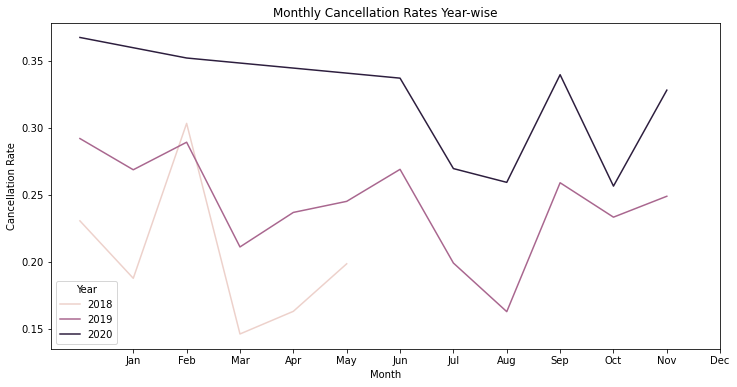

In [22]:
# Create a time series plot for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancelation_rates, x='arrival_date_month', y='is_canceled', hue='arrival_date_year')
plt.title('Monthly Cancellation Rates Year-wise')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()


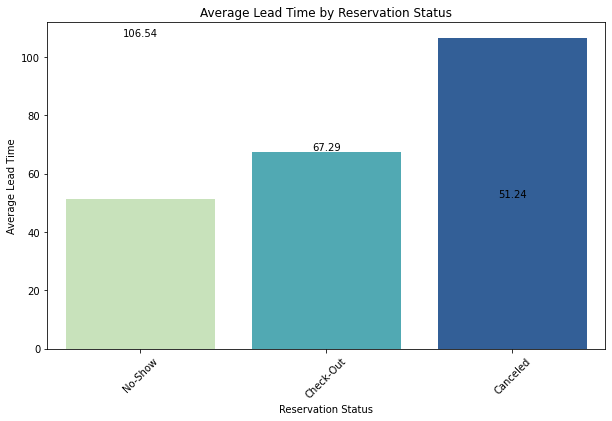

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by reservation status and calculate the average lead time
reservation_lead_time = hotel_data.groupby('reservation_status')['lead_time'].mean().reset_index()

# Sort the data for plotting
reservation_lead_time = reservation_lead_time.sort_values(by='lead_time')

# Create a bar plot with labels
plt.figure(figsize=(10, 6))
sns.barplot(data=reservation_lead_time, x='reservation_status', y='lead_time', palette='YlGnBu')
plt.title('Average Lead Time by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Average Lead Time')

# Add data labels to the bars
for index, row in reservation_lead_time.iterrows():
    plt.text(index, row['lead_time'], f'{row["lead_time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()



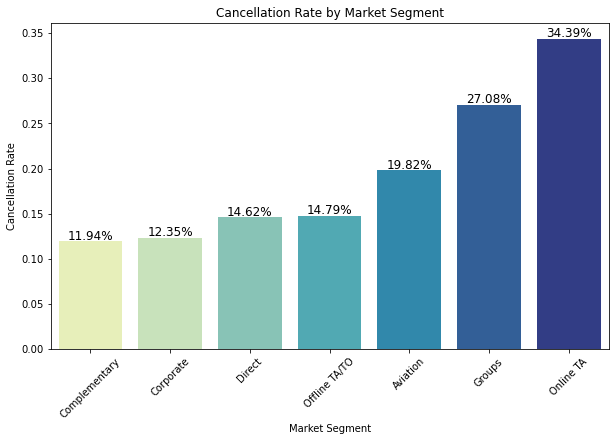

In [40]:


# Group the data by market segment and calculate the cancellation rate
market_segment_cancellation_rate = hotel_data.groupby('market_segment')['is_canceled'].mean().reset_index()

# Sort the data for plotting
market_segment_cancellation_rate = market_segment_cancellation_rate.sort_values(by='is_canceled')

# Create a bar plot for market segment cancellation rates with 'YlGnBu' color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=market_segment_cancellation_rate, x='market_segment', y='is_canceled', palette='YlGnBu')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()




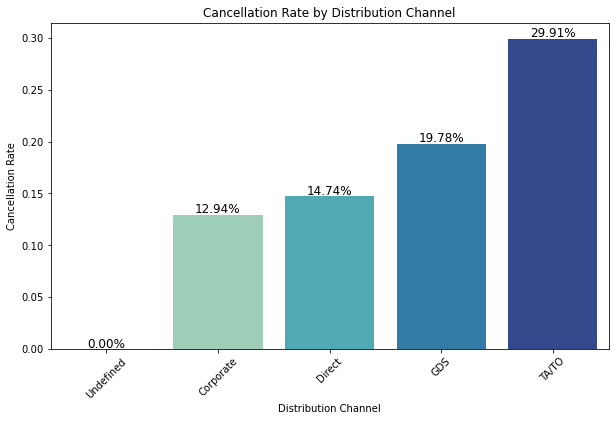

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by distribution channel and calculate the cancellation rate
distribution_channel_cancellation_rate = hotel_data.groupby('distribution_channel')['is_canceled'].mean().reset_index()

# Sort the data for plotting
distribution_channel_cancellation_rate = distribution_channel_cancellation_rate.sort_values(by='is_canceled')

# Create a bar plot for distribution channel cancellation rates
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=distribution_channel_cancellation_rate, x='distribution_channel', y='is_canceled', palette='YlGnBu')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()



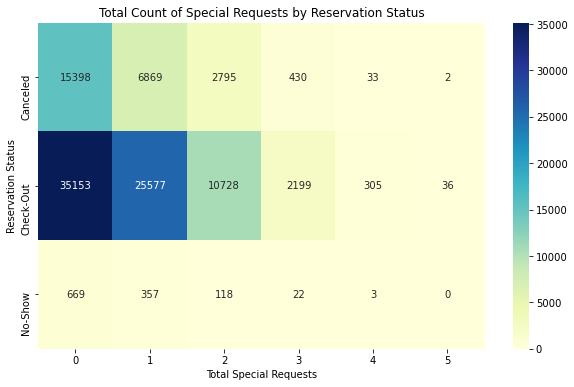

In [26]:
# Create a pivot table with 'reservation_status' and 'total_of_special_requests' as indices
pivot_table = hotel_data.pivot_table(index='reservation_status', columns='total_of_special_requests', aggfunc='size', fill_value=0)

# Create a heatmap using a color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Total Count of Special Requests by Reservation Status')
plt.xlabel('Total Special Requests')
plt.ylabel('Reservation Status')
plt.show()


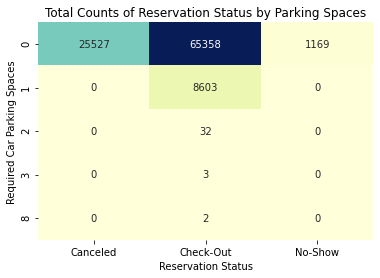

In [27]:
# Assuming 'hotel_data' is your DataFrame
pivot_table = hotel_data.pivot_table(index='required_car_parking_spaces', columns='reservation_status', values='adr', aggfunc='count', fill_value=0)

# Create a heatmap with a color scheme
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

plt.title('Total Counts of Reservation Status by Parking Spaces')
plt.xlabel('Reservation Status')
plt.ylabel('Required Car Parking Spaces')

plt.show()


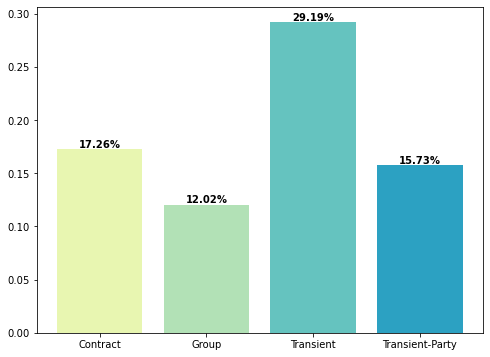

In [38]:
import matplotlib.pyplot as plt

# Group the data by customer type and calculate cancellation rates
customer_type_cancellation = hotel_data.groupby('customer_type')['is_canceled'].mean().reset_index()

# Create a bar plot with 'YlGnBu' color palette and data labels
plt.figure(figsize=(8, 6))
bars = plt.bar(customer_type_cancellation['customer_type'], customer_type_cancellation['is_canceled'], color=sns.color_palette('YlGnBu'))

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')


# Show the plot
plt.show()


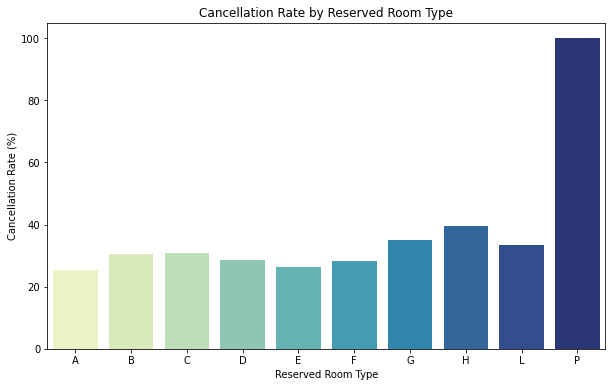

In [43]:
# Calculate the cancellation rate for each room type
cancellation_rate_by_room_type = hotel_data.groupby('reserved_room_type')['is_canceled'].mean() * 100

# Create a bar chart with the 'YlGnBu' color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate_by_room_type.index, y=cancellation_rate_by_room_type.values, palette='YlGnBu')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Reserved Room Type')
plt.title('Cancellation Rate by Reserved Room Type')
plt.xticks(rotation=0)
plt.show()


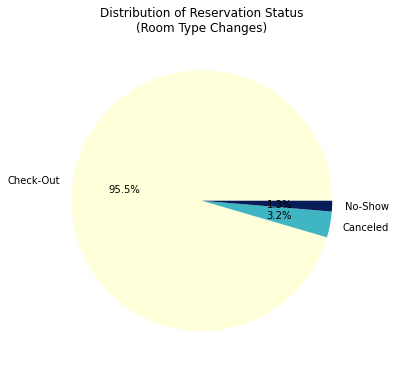

In [29]:
import matplotlib.pyplot as plt

# Filter rows where 'reserved_room_type' and 'assigned_room_type' are not similar
room_type_changes = hotel_data[hotel_data['reserved_room_type'] != hotel_data['assigned_room_type']]

# Count occurrences of each 'reservation_status' when 'reserved_room_type' and 'assigned_room_type' are not similar
reservation_status_counts = room_type_changes['reservation_status'].value_counts(normalize=True)

# Define the 'YlGnBu' color palette
colors = plt.cm.YlGnBu(np.linspace(0, 1, len(reservation_status_counts)))

# Create a pie chart with 'YlGnBu' color palette
plt.figure(figsize=(8, 6))
plt.pie(reservation_status_counts, labels=reservation_status_counts.index, autopct=lambda p: f'{p:.1f}%', colors=colors)
plt.title("Distribution of Reservation Status\n(Room Type Changes)")
plt.show()


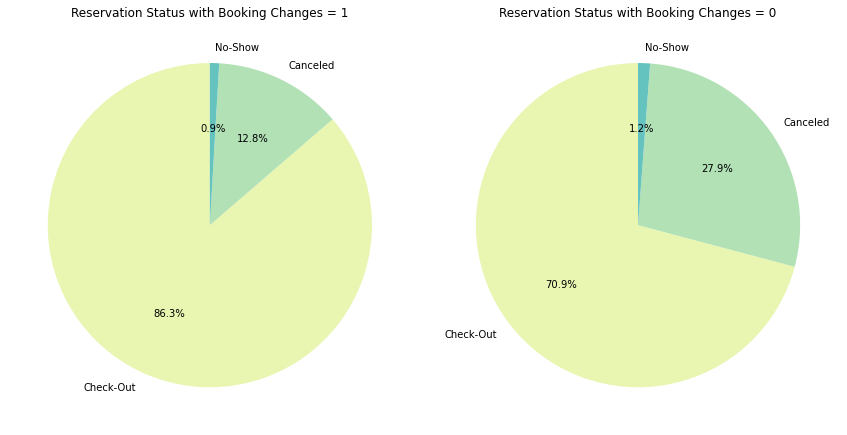

In [30]:
import matplotlib.pyplot as plt

# Filter rows where 'booking_changes' is 1 or 0
booking_changes_1 = hotel_data[hotel_data['booking_changes'] == 1]
booking_changes_0 = hotel_data[hotel_data['booking_changes'] == 0]

# Calculate percentage total for each 'reservation_status' in each group
total_1 = len(booking_changes_1)
total_0 = len(booking_changes_0)

reservation_status_counts_1 = booking_changes_1['reservation_status'].value_counts() / total_1 * 100
reservation_status_counts_0 = booking_changes_0['reservation_status'].value_counts() / total_0 * 100

# Create two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'Booking Changes = 1'
ax1.pie(reservation_status_counts_1, labels=reservation_status_counts_1.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
ax1.set_title('Reservation Status with Booking Changes = 1')

# Pie chart for 'Booking Changes = 0'
ax2.pie(reservation_status_counts_0, labels=reservation_status_counts_0.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
ax2.set_title('Reservation Status with Booking Changes = 0')

plt.tight_layout()
plt.show()


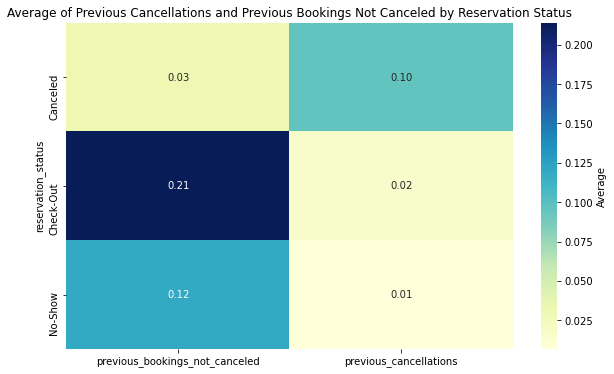

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with 'reservation_status' as the index and the average of 'previous_cancellations' and 'previous_bookings_not_canceled' as values
pivot_table = hotel_data.pivot_table(index='reservation_status', values=['previous_cancellations', 'previous_bookings_not_canceled'], aggfunc='mean')

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average'}, fmt='.2f')
plt.title('Average of Previous Cancellations and Previous Bookings Not Canceled by Reservation Status')
plt.show()


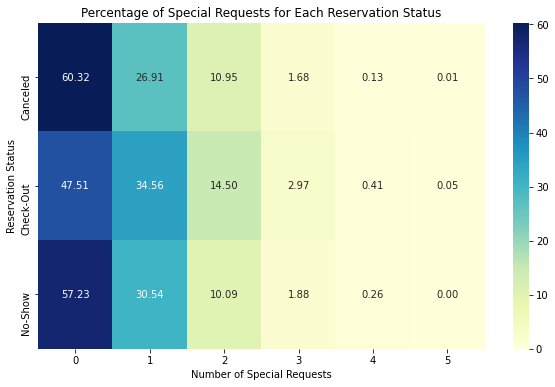

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for reservation statuses 'Canceled', 'No-Show', and 'Check-Out'
selected_reservation_statuses = ['Canceled', 'No-Show', 'Check-Out']
filtered_data = hotel_data[hotel_data['reservation_status'].isin(selected_reservation_statuses)]

# Create a pivot table to calculate the percentage of each number of special requests for each reservation status
pivot_table = pd.pivot_table(filtered_data, values='adr', index='reservation_status', columns='total_of_special_requests', aggfunc='count', fill_value=0)
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Create a heatmap to visualize the results
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Percentage of Special Requests for Each Reservation Status')
plt.ylabel('Reservation Status')
plt.xlabel('Number of Special Requests')
plt.show()


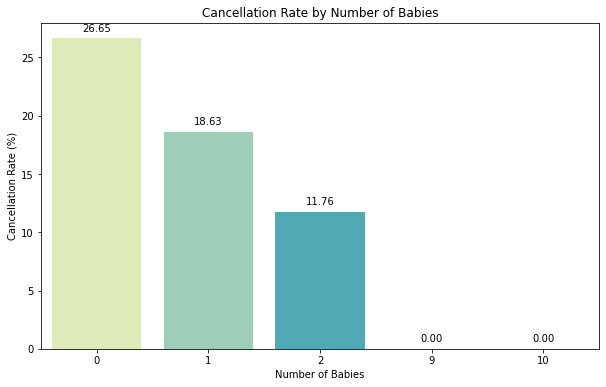

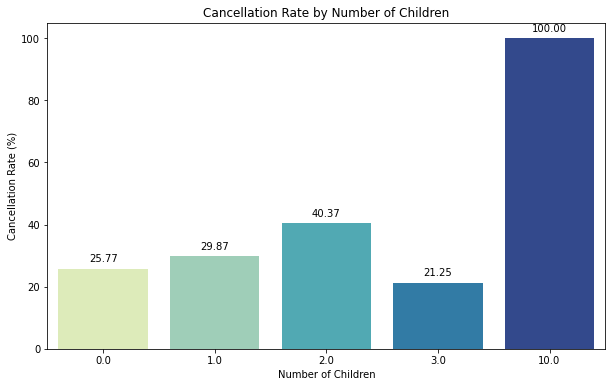

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the cancellation rate for each value in 'babies'
cancellation_rate_babies = hotel_data.groupby('babies')['is_canceled'].mean() * 100

# Create a bar chart with the 'YlGnBu' color palette and data labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cancellation_rate_babies.index, y=cancellation_rate_babies, palette='YlGnBu')

plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Number of Babies')
plt.title('Cancellation Rate by Number of Babies')
plt.xticks(rotation=0)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Calculate the cancellation rate for each value in 'children'
cancellation_rate_children = hotel_data.groupby('children')['is_canceled'].mean() * 100

# Create a bar chart with the 'YlGnBu' color palette and data labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cancellation_rate_children.index, y=cancellation_rate_children, palette='YlGnBu')

plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Number of Children')
plt.title('Cancellation Rate by Number of Children')
plt.xticks(rotation=0)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()



# Predictive Modeling

In [34]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select the columns of interest
selected_columns = ['lead_time', 'arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'is_canceled']

# Create a subset of the data with the selected columns
subset_data = hotel_data[selected_columns]

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
for col in categorical_columns:
    subset_data[col] = label_encoder.fit_transform(subset_data[col])

# Split the data into features (X) and the target variable (y)
X = subset_data.drop(columns='is_canceled')
y = subset_data['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Get feature importances
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_feature_importance = dict(sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True))

print("\nFeature Importance (Top 10):")
for feature, importance in list(sorted_feature_importance.items())[:10]:
    print(f"{feature}: {importance:.4f}")


<ipython-input-34-698e06e50bd2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = label_encoder.fit_transform(subset_data[col])
<ipython-input-34-698e06e50bd2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = label_encoder.fit_transform(subset_data[col])
<ipython-input-34-698e06e50bd2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     14809
           1       0.61      0.52      0.56      5330

    accuracy                           0.78     20139
   macro avg       0.72      0.70      0.71     20139
weighted avg       0.77      0.78      0.78     20139

Accuracy: 0.7833556780376384

Feature Importance (Top 10):
lead_time: 0.5270
country: 0.1895
arrival_date_month: 0.0959
market_segment: 0.0690
reserved_room_type: 0.0468
customer_type: 0.0305
deposit_type: 0.0267
distribution_channel: 0.0145
